In [12]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [13]:
from LocKMeans import LocKMeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
import time

In [16]:
np.inf

inf

## 1. Comparing results with standard KMeans clustering

In [17]:
np.random.seed(1234)
n_cluster = 10
points_in_cluster = 100
n_sample_arr = np.repeat(points_in_cluster+20, n_cluster)
cluster_std_arr = np.random.rand(n_cluster)*2 + 1

In [18]:
X, y, centers = make_blobs(n_samples = n_sample_arr, cluster_std = cluster_std_arr, return_centers = True)

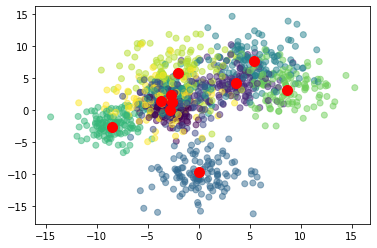

In [19]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], s=100, c="red")
plt.show()

In [20]:
lkm = LocKMeans(n_clusters=n_cluster, cluster_size=points_in_cluster, max_iter=100)
lkm.fit(X)
labels = lkm.predict(X)
cluster_centers = lkm.cluster_centers_

100%|██████████| 100/100 [00:00<00:00, 113.15it/s]


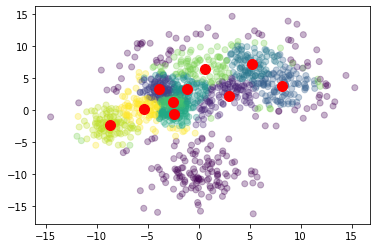

In [21]:
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, c="red")
plt.show()

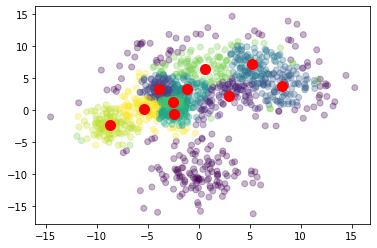

In [22]:
plt.scatter(X[:,0], X[:,1], c=lkm.labels_, alpha=0.3)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, c="red")
plt.show()

In [23]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
counts_elements

array([200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], dtype=int64)

In [24]:
km = KMeans(n_clusters=n_cluster)
labels = km.fit_predict(X)
kmeans_centers = km.cluster_centers_

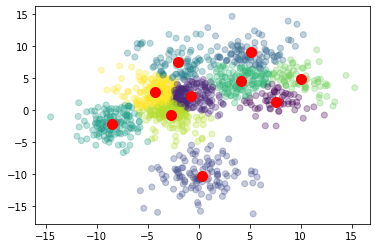

In [25]:
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
plt.scatter(kmeans_centers[:,0], kmeans_centers[:,1], s=100, c="red")
plt.show()

In [26]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
counts_elements

array([ 59, 164, 115,  85,  86, 132, 133,  70, 171, 185], dtype=int64)

## 2. Comparing time efficiency

In [27]:
n_cluster = 100
points_in_cluster = 100
n_sample_arr = np.repeat(points_in_cluster, n_cluster)
cluster_std_arr = np.random.rand(n_cluster)*10

In [28]:
X, y, centers = make_blobs(n_samples = n_sample_arr, cluster_std = cluster_std_arr, return_centers = True)

In [29]:
lkm = LocKMeans(n_clusters=n_cluster, cluster_size=points_in_cluster, max_iter=100, hide_pbar=True)
start = time.time()
lkm.fit(X)
print(f"Fitting took {time.time() - start}s")

Fitting took 7.305102348327637s


In [30]:
km = KMeans(n_clusters=n_cluster, max_iter=100)
start = time.time()
labels = km.fit(X)
print(f"Fitting took {time.time() - start}s")

Fitting took 3.4452695846557617s


100%|██████████| 100/100 [01:49<00:00,  1.10s/it]


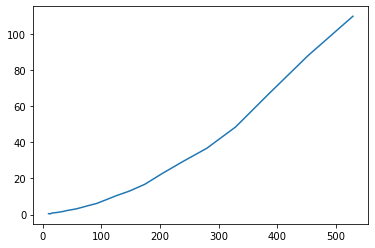

In [39]:
n_cluster_list = np.logspace(1, 3, 30).astype(int)[:-4]
points_in_cluster = 100
fitting_time_list = []
for n_cluster in n_cluster_list:
    n_sample_arr = np.repeat(points_in_cluster, n_cluster)
    cluster_std_arr = np.random.rand(n_cluster)*10
    X, y, centers = make_blobs(n_samples = n_sample_arr, cluster_std = cluster_std_arr, return_centers = True)
    lkm = LocKMeans(n_clusters=n_cluster, cluster_size=points_in_cluster, max_iter=100)
    start = time.time()
    lkm.fit(X)
    fitting_time_list.append(time.time() - start)
plt.plot(n_cluster_list, fitting_time_list)
plt.show()

100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


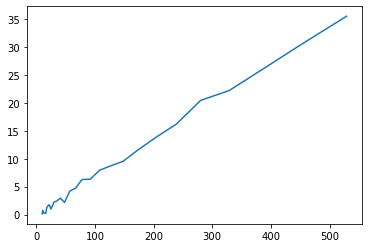

In [40]:
n_cluster = 100
points_in_cluster_list = np.logspace(1, 3, 30).astype(int)[:-4]
fitting_time_list = []
for points_in_cluster in points_in_cluster_list:
    n_sample_arr = np.repeat(points_in_cluster, n_cluster)
    cluster_std_arr = np.random.rand(n_cluster)*10
    X, y, centers = make_blobs(n_samples = n_sample_arr, cluster_std = cluster_std_arr, return_centers = True)
    lkm = LocKMeans(n_clusters=n_cluster, cluster_size=points_in_cluster, max_iter=100)
    start = time.time()
    lkm.fit(X)
    fitting_time_list.append(time.time() - start)
plt.plot(points_in_cluster_list, fitting_time_list)
plt.show()